# How to select a mesh subset?

This notebook shows how to select a subset of a mesh that is encoded by a color.

In [1]:
import pyvista as pv

from polpo.preprocessing import ListSqueeze
from polpo.preprocessing.load.pregnancy import PregnancyPilotSegmentationsLoader
from polpo.preprocessing.mesh.conversion import PvFromData
from polpo.preprocessing.mesh.filter import PvSelectColor
from polpo.preprocessing.mri import (
    MeshExtractorFromSegmentedImage,
    MriImageLoader,
    segmtool2encoding,
)

[KeOps] Warning : cuda was detected, but driver API could not be initialized. Switching to cpu only.


In [2]:
STATIC_VIZ = True

if STATIC_VIZ:
    pv.set_jupyter_backend("static")

## Mesh from MRI

Following [How to get a mesh from an MRI image?](mri2mesh.ipynb), we get a `pv.PolyData` object representing the hippocampus.

In [3]:
SESSION_ID = 1

In [4]:
pipe = (
    PregnancyPilotSegmentationsLoader(subset=[SESSION_ID])
    + ListSqueeze()
    + MriImageLoader()
    + MeshExtractorFromSegmentedImage(encoding="ashs")
    + PvFromData()
)

In [5]:
mesh = pipe()

INFO: Data has already been downloaded... using cached file ('/home/luisfpereira/.herbrain/data/pregnancy/Segmentations/BB01').


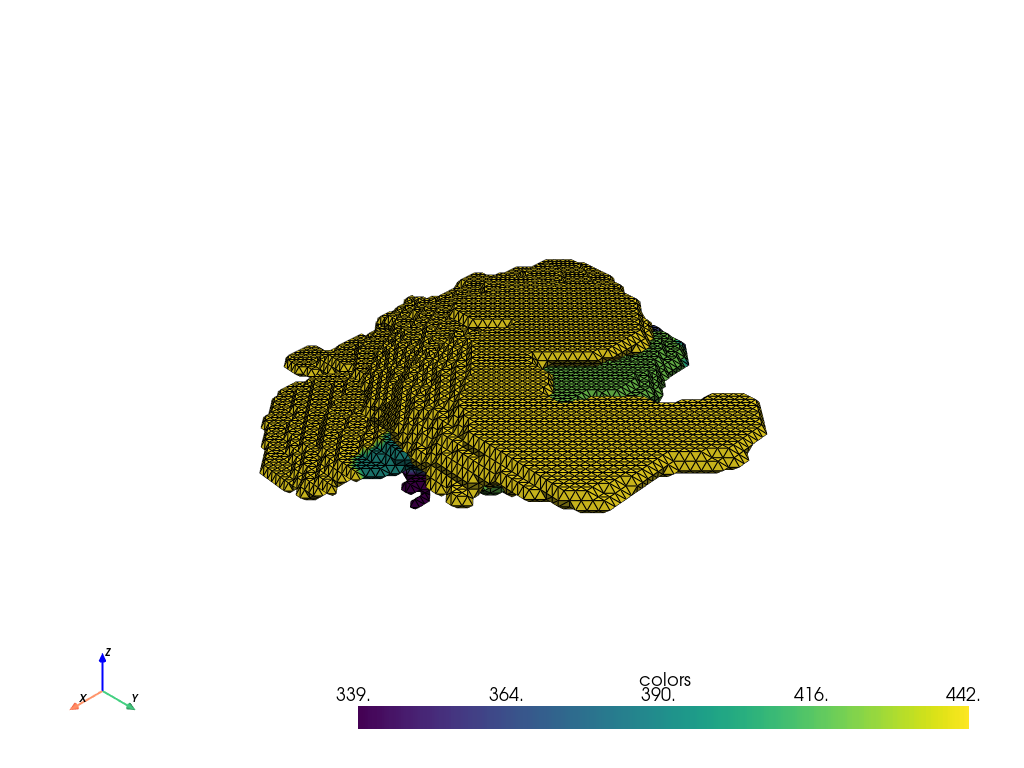

In [6]:
pl = pv.Plotter(border=False)

pl.show_axes()
pl.add_mesh(mesh, show_edges=True)
pl.show()

## Select a substructure

Substructures are encoded by colors. In this particular case, the encoding is generated by [ASHS](https://www.nitrc.org/projects/ashs). We provide access to the encoding.

In [7]:
encoding = segmtool2encoding(tool="ashs")

We now create a preprocessing step that selects the cells of the mesh with the given color.

In [8]:
struct_selector = PvSelectColor(extract_surface=True)

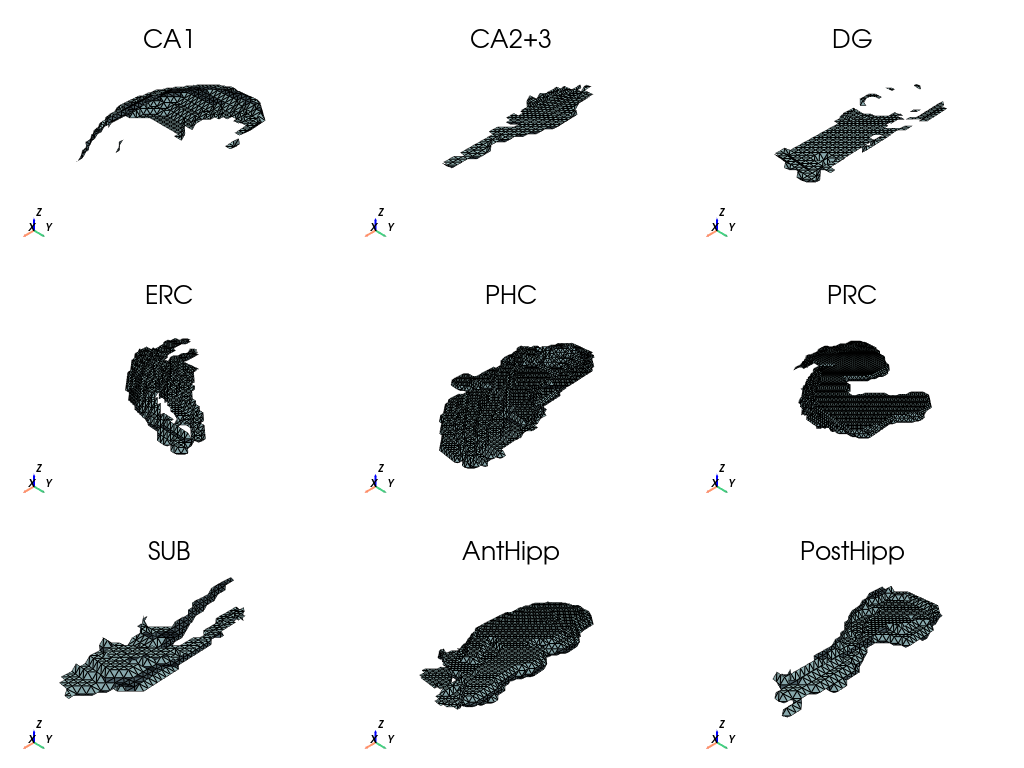

In [9]:
n_cols = 3
pl = pv.Plotter(shape=(3, n_cols), border=False)

for index, (struct_name, color) in enumerate(encoding.structs2colors.items()):
    row, col = index // n_cols, index % n_cols
    pl.subplot(row, col)

    substructure = struct_selector((mesh, color))

    pl.show_axes()
    substructure.clear_data()
    pl.add_mesh(substructure, show_edges=True)
    pl.add_title(struct_name, font_size=10)

pl.show()

Any mesh preprocessing step can now be applied to the substructure.

NB: recall that a substructure can directly be extracted from the image, as shown [here](./mri2mesh.ipynb).